# Store Sales Analysis

In this project we take a dataset of a Super Store and analyze its sales,of which category of which region and infer meaningful insights to the store in order to improve their overall Sales.

## Downloading the Dataset

We download the dataset from kaggle.

In [68]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [69]:
# Change this
dataset_url = 'https://www.kaggle.com/rohitsahoo/sales-forecasting'

In [70]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gvjvamsiram
Your Kaggle Key: ········


100%|██████████| 480k/480k [00:00<00:00, 11.3MB/s]

The dataset has been downloaded and extracted.

In [71]:
data_dir = './sales-forecasting'

In [72]:
import os
os.listdir(data_dir)

['train.csv']

Let us save and upload our work to Jovian before continuing.

In [73]:
project_name = "zerotopandas-course-project-store-sales-analysis" # change this (use lowercase letters and hyphens only)

In [74]:
!pip install jovian --upgrade -q

In [75]:
import jovian

In [76]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vamsiramg/zerotopandas-course-project-store-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/vamsiramg/zerotopandas-course-project-store-sales-analysis


'https://jovian.ai/vamsiramg/zerotopandas-course-project-store-sales-analysis'

## Data Preparation and Cleaning

Here we have taken the data of the sales of a store in different regions in order to explore and analyze various trends in the sales.

Initially,read the data which is in the form of csv by using pandas library.By using the head() method,we can see the first few rows and columns of the dataset.

In [77]:
import pandas as pd
data=pd.read_csv('train.csv')
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Now in order to know how many rows and columns are present in the dataset, we make use of the .shape method and we can observe that there are 9800 rows and 18 columns

In [78]:
data.shape

(9800, 18)

In order to know the data types of each of the columns we can use .dtypes method. 

In [79]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

We drop the duplicate values by using drop_duplicates() method. 

In [80]:
data.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


Similarly we drop the null values by using dropna() method.After droping the null values we can observe that the total number of rows changed to 9789 rows.

In [81]:
data.dropna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [83]:
import jovian

In [84]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vamsiramg/zerotopandas-course-project-store-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/vamsiramg/zerotopandas-course-project-store-sales-analysis


'https://jovian.ai/vamsiramg/zerotopandas-course-project-store-sales-analysis'

## Exploratory Analysis and Visualization

Here we analyze various trends in the Store Sales dataset.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [85]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

To find the average sales of the store,we compute the mean of the Sales column.

In [86]:
average_sales = data['Sales'].mean()
print('The average sales(in$) of the store is: ',int(average_sales))

The average sales(in$) of the store is:  230


Now obtain the regions with sales done above the average sales.We can observe that in total there are 2324 orders with Sales above the average sale price.

In [87]:
sales_above_average=data[data['Sales']>230]
sales_above_average

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
10,11,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9781,9782,CA-2017-153178,14/09/2017,18/09/2017,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Long Beach,New York,11561.0,East,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.5680
9782,9783,CA-2016-149748,31/05/2016,02/06/2016,Second Class,EM-13825,Elizabeth Moffitt,Corporate,United States,Paterson,New Jersey,7501.0,East,OFF-PA-10002120,Office Supplies,Paper,Xerox 1889,274.8000
9787,9788,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320
9788,9789,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.5580


Similarly we can obtain the orders that are below the average Sale price.We can observe that there in 7476 orders in total whose Sales are less than the average sale price.

In [88]:
sales_below_average=data[data['Sales']<230]
sales_below_average

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,9795,CA-2015-127166,21/05/2015,23/05/2015,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,18.240
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376


Here we can observe that in order whose Sales are above average sale price,majority of the orders belong to Consumer segment.

<AxesSubplot:>

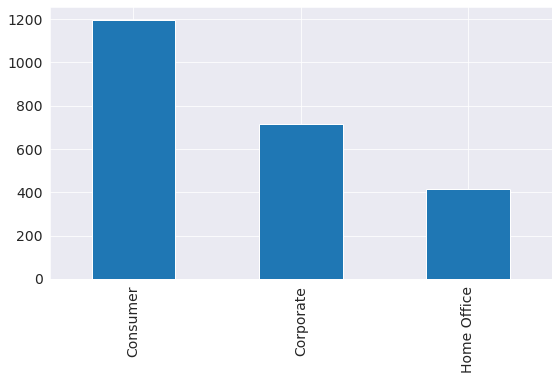

In [89]:
sales_above_average['Segment'].value_counts().plot(kind='bar')

Likewise we can observe that in order whose Sales are below average sale price,majority of the orders belong to Consumer segment.

<AxesSubplot:ylabel='Segment'>

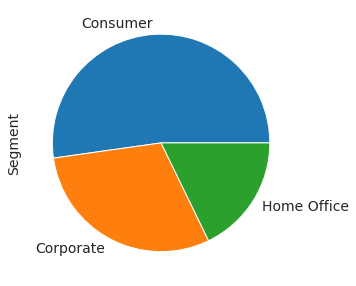

In [90]:
sales_below_average['Segment'].value_counts().plot(kind='pie')

We can observe that most of the orders having sale price above average,were shipped by Standard Class

<AxesSubplot:>

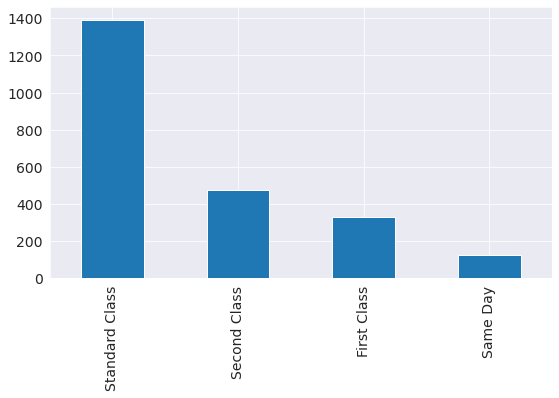

In [91]:
sales_above_average['Ship Mode'].value_counts().plot(kind='bar')

Similarly we can observe this thrend in order with sales below average sale price.

<AxesSubplot:ylabel='Ship Mode'>

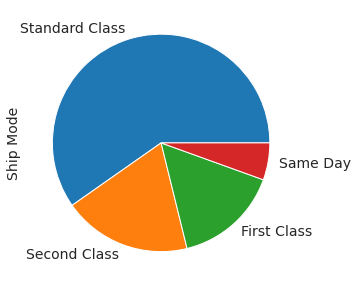

In [92]:
sales_below_average['Ship Mode'].value_counts().plot(kind='pie')

Let us save and upload our work to Jovian before continuing

In [93]:
import jovian

In [94]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vamsiramg/zerotopandas-course-project-store-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/vamsiramg/zerotopandas-course-project-store-sales-analysis


'https://jovian.ai/vamsiramg/zerotopandas-course-project-store-sales-analysis'

#### Q1: In the sales_above _average table, find how many of them are office supplies.

In [95]:
office_supplies=sales_above_average[sales_above_average['Category']=='Office Supplies']
office_supplies

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
13,14,CA-2017-161389,05/12/2017,10/12/2017,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976
16,17,CA-2015-105893,11/11/2015,18/11/2015,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880
67,68,CA-2015-106376,05/12/2015,10/12/2015,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Gilbert,Arizona,85234.0,West,OFF-AR-10002671,Office Supplies,Art,Hunt BOSTON Model 1606 High-Volume Electric Pe...,1113.024
84,85,US-2018-119662,13/11/2018,16/11/2018,First Class,CS-12400,Christopher Schild,Home Office,United States,Chicago,Illinois,60623.0,Central,OFF-ST-10003656,Office Supplies,Storage,Safco Industrial Wire Shelving,230.376
127,128,US-2018-107272,05/11/2018,12/11/2018,Standard Class,TS-21610,Troy Staebel,Consumer,United States,Phoenix,Arizona,85023.0,West,OFF-ST-10002974,Office Supplies,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",243.992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9755,9756,CA-2018-113705,27/03/2018,29/03/2018,Second Class,LC-16870,Lena Cacioppo,Consumer,United States,Richmond,Virginia,23223.0,South,OFF-ST-10001128,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",332.940
9763,9764,CA-2015-121762,14/02/2015,18/02/2015,Standard Class,ML-17395,Marina Lichtenstein,Corporate,United States,Seattle,Washington,98103.0,West,OFF-SU-10000157,Office Supplies,Supplies,Compact Automatic Electric Letter Opener,238.620
9774,9775,CA-2015-169019,26/07/2015,30/07/2015,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207.0,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584
9781,9782,CA-2017-153178,14/09/2017,18/09/2017,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Long Beach,New York,11561.0,East,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568


In [96]:
print('The orders above average sale price with the category of office supplies: ',office_supplies.Category.count())

The orders above average sale price with the category of office supplies:  650


#### Q2: Of these office supplies find from which region these orders came from.

<AxesSubplot:>

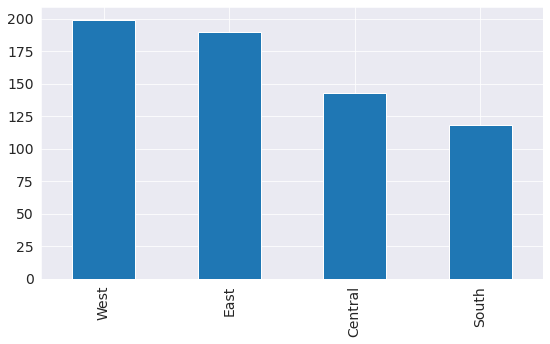

In [97]:
office_supplies['Region'].value_counts().plot(kind='bar')

#### Q3: In the sales_above _average table, find how many of them are of the category Furniture.

In [98]:
furniture_sales=sales_above_average[sales_above_average['Category']=='Furniture']
furniture_sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
10,11,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840
24,25,CA-2016-106320,25/09/2016,30/09/2016,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9757,CA-2018-113705,27/03/2018,29/03/2018,Second Class,LC-16870,Lena Cacioppo,Consumer,United States,Richmond,Virginia,23223.0,South,FUR-TA-10002533,Furniture,Tables,BPI Conference Tables,292.1000
9759,9760,CA-2017-146913,31/10/2017,05/11/2017,Standard Class,SF-20965,Sylvia Foulston,Corporate,United States,San Francisco,California,94109.0,West,FUR-CH-10001854,Furniture,Chairs,Office Star - Professional Matrix Back Chair w...,1403.9200
9769,9770,CA-2017-123533,24/11/2017,30/11/2017,Standard Class,SC-20050,Sample Company A,Home Office,United States,Hialeah,Florida,33012.0,South,FUR-BO-10001619,Furniture,Bookcases,O'Sullivan Cherrywood Estates Traditional Book...,339.9200
9787,9788,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320


In [99]:
print('The orders above average sale price with the category of furniture: ',furniture_sales.Category.count())

The orders above average sale price with the category of furniture:  895


#### Q4: Of the entire Store Sales data set,what is the category with most number of orders

<AxesSubplot:ylabel='Category'>

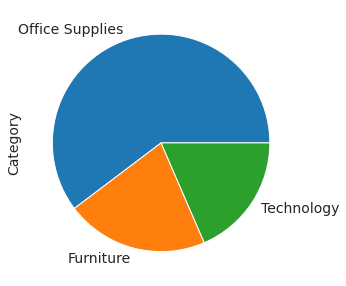

In [100]:
data['Category'].value_counts().plot(kind='pie')

#### Q5: What is the sum of total sales pertaining to the office supplies?

In [101]:
sales_office_supplies=data[data['Category']=='Office Supplies']
sales_office_supplies

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,9792,CA-2015-127166,21/05/2015,23/05/2015,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-EN-10003134,Office Supplies,Envelopes,Staple envelope,56.064
9793,9794,CA-2015-127166,21/05/2015,23/05/2015,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4” x 11”",4.832
9794,9795,CA-2015-127166,21/05/2015,23/05/2015,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,18.240
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798


In [102]:
print('The sum of total sales(in$) pertaining to the office supplies: ',sales_office_supplies['Sales'].sum())

The sum of total sales(in$) pertaining to the office supplies:  705422.334


Let us save and upload our work to Jovian before continuing.

In [103]:
import jovian

In [104]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vamsiramg/zerotopandas-course-project-store-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/vamsiramg/zerotopandas-course-project-store-sales-analysis


'https://jovian.ai/vamsiramg/zerotopandas-course-project-store-sales-analysis'

## Inferences and Conclusion

Hence we have analyzed and visualized the Store Sales dataset.Through our observations we can observe that:

1.We calculated the average Sales of the Store in all the regions.

2.We have segregated the sales done above average sale price and below average sale price.

3.In the sales done above average sale price, we can observe that most of the orders belong to the Consumer segment.

4.The mode of shipping of these orders also mostly Standard Class.

5.We have obtained the number of orders of Office Supplies and the regions from which these have been ordered.

6.We can also observe that the Category with most number of orders is Office Supplies.

In [105]:
import jovian

In [106]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vamsiramg/zerotopandas-course-project-store-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/vamsiramg/zerotopandas-course-project-store-sales-analysis


'https://jovian.ai/vamsiramg/zerotopandas-course-project-store-sales-analysis'

## References and Future Work

Therefore we can provide meaningful insights to the Store that, they need to maintain safety stock levels of Office Supplies which majorly constitute the Sales.

Also they need to do ground work due to the less number of orders originating from the South region.

They must also target the Home Office segment in order to improve their Sales.


In [107]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
